In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

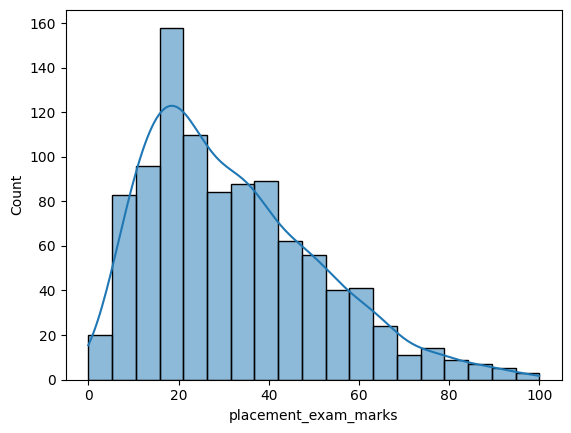

In [8]:
sns.histplot(df['placement_exam_marks'], kde=True)

<Axes: xlabel='placement_exam_marks', ylabel='cgpa'>

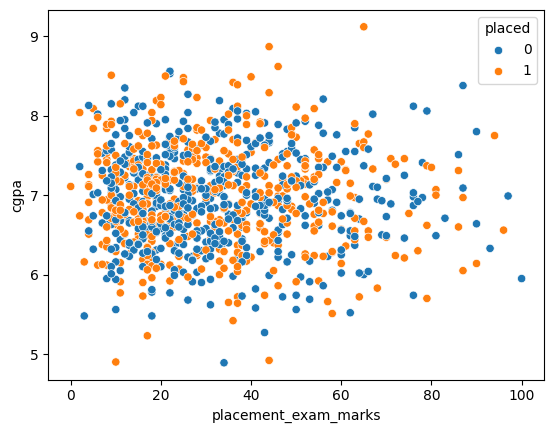

In [27]:
sns.scatterplot(y='cgpa', x='placement_exam_marks', data=df, hue='placed')

<Axes: xlabel='cgpa', ylabel='placement_exam_marks'>

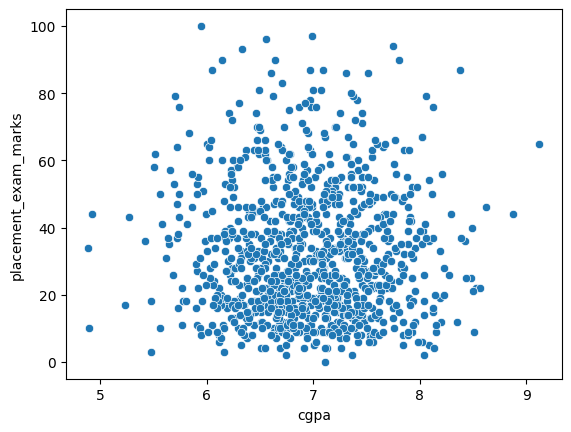

In [15]:
sns.scatterplot(x='cgpa', y='placement_exam_marks', data=df)

<Axes: ylabel='cgpa'>

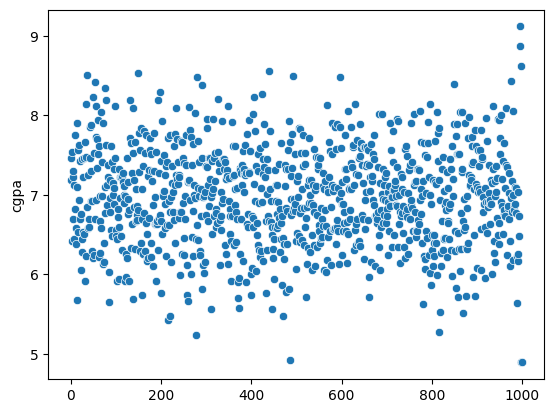

In [21]:
sns.scatterplot(df['cgpa'])

<Axes: ylabel='count'>

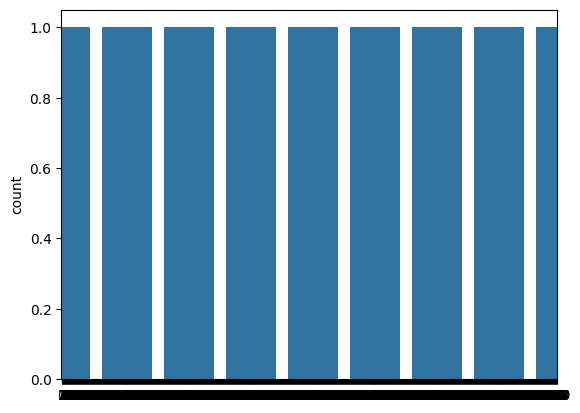

In [26]:
sns.countplot(df['cgpa'])

In [28]:
df['placed'].value_counts()

placed
0    511
1    489
Name: count, dtype: int64

In [41]:
mask = df['cgpa'] < 7.0
df['cgpa'][mask]
# df['cgpa'][df['cgpa'] < 7.0]


3      6.42
6      6.69
8      6.45
10     6.82
11     6.38
       ... 
992    6.26
993    6.73
994    6.48
997    4.89
999    4.90
Name: cgpa, Length: 522, dtype: float64

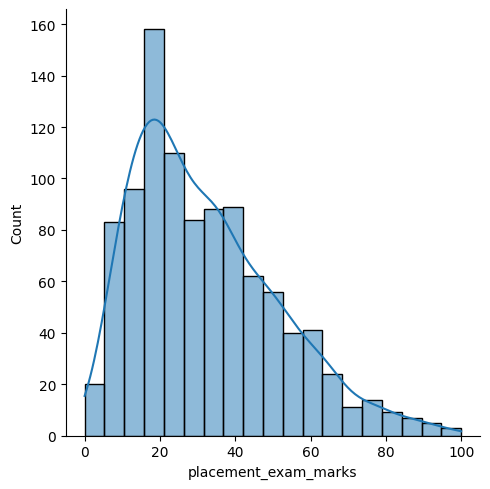

In [42]:
sns.displot(df['placement_exam_marks'], kde=True)

In [47]:
df['placement_exam_marks'].skew()     # ---> marks data is more skewed and for cgpa - it is close to 0

np.float64(0.8356419499466834)

In [48]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [53]:
medi = df['placement_exam_marks'].median()

percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [57]:
iqr = percentile75 - percentile25

In [58]:
lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr

### we don't need braces - python will do the job 

In [61]:
# finding the outliers 

mask = df['placement_exam_marks'] < lower_limit
df['placement_exam_marks'][mask]

Series([], Name: placement_exam_marks, dtype: float64)

In [67]:

mask = df['placement_exam_marks'] > upper_limit
df['placement_exam_marks'][mask]

9       94.0
40      86.0
61      86.0
134     93.0
162     90.0
283     87.0
290     87.0
311     87.0
324     90.0
630     96.0
685     87.0
730     90.0
771     86.0
846     97.0
917    100.0
Name: placement_exam_marks, dtype: float64

# Trimming

In [70]:
mask = df['placement_exam_marks'] < upper_limit
new_df = df['placement_exam_marks'][mask]

In [73]:
df1 = df['cgpa'][mask]
df2 = df['placed'][mask]

In [76]:
df3 = df[mask]

In [77]:
df3

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1
